# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 4. Доверительные интервалы
### Дедлайн --- 23 ноября 9:00

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

from tqdm.notebook import tqdm
from typing import Callable

sns.set(font_scale=1.4, style='whitegrid', palette='Set2')

## Задача 1

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал оценки $\widehat{\theta}$
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

In [2]:
# YOUR CODE GOES HERE
N = 100
n = np.arange(1, N+1)
gamma = 0.95

def draw_confidence_interval(sample, estimates, confidence_interval, title):
    """
    estimates : array with shape (n, )
    confidence_interval : array with shape (n , 2)
    """
    
    plt.figure(figsize=(16, 10))
    plt.title(title)
    plt.xlabel("n")
    plt.ylabel("sample")
    
    plt.plot(n, estimates, label="estimate")
    plt.fill_between(n, confidence_interval[:, 0], confidence_interval[:, 1],
                     label="confidence interval of level 0.95", alpha=0.15)
    plt.scatter(n, sample, label="sample", alpha=0.3, color="r")
    
    plt.legend()
    plt.show()

Выполните задание для следующих $P_\theta$ и $\widehat{\theta}$ (формулы доверительных итервалов были получены на семинарах):

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

ДИ Уровня $\gamma = 0.95$ (через нер-во Чебышева) :

$$
(\frac{\overline{X}}{\frac{1}{2}+\frac{1}{\sqrt{(1-\gamma)12n}}}, \frac{\overline{X}}{\frac{1}{2}-\frac{1}{\sqrt{(1-\gamma)12n}}})
$$
или: 
$$
(\frac{\overline{X} \sqrt{(1-\gamma)12n}}{\sqrt{(1-\gamma)3n}+1}, \frac{\overline{X} \sqrt{(1-\gamma)12n}}{\sqrt{(1-\gamma)3n}-1})
$$

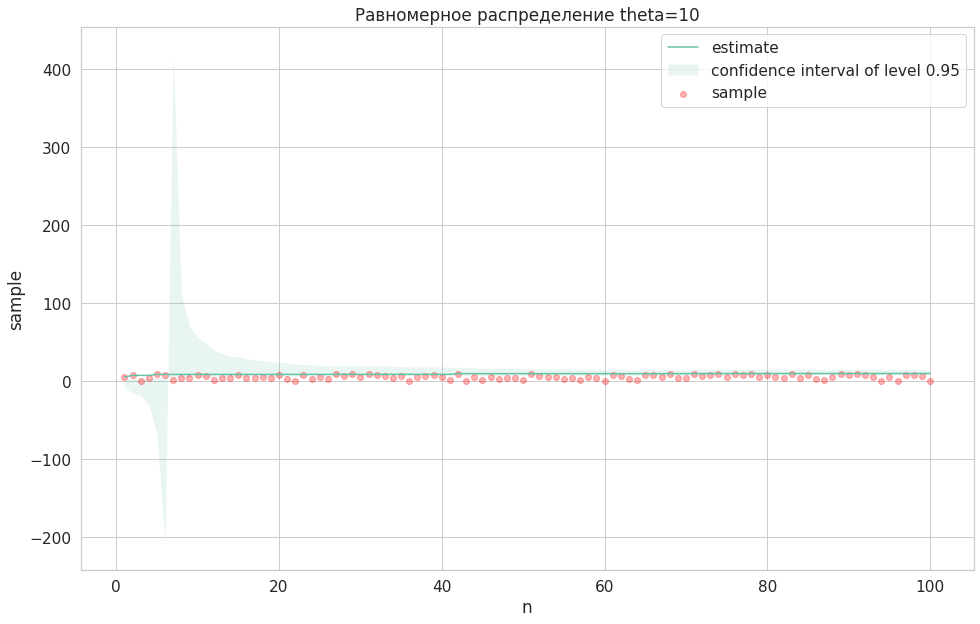

In [3]:
# YOUR CODE GOES HERE
def uniform_CI(sample):
    alpha = np.sqrt((1-gamma)*12*len(sample))
    left = np.mean(sample) * alpha / (alpha/2 + 1)
    right = np.mean(sample) * alpha / (alpha/2 - 1)

#    print("[{}, {}] and n is {}, alpha is {}".format(left, right, len(sample), alpha))
    
    return [left, right]

uniform_sample = sps.uniform.rvs(loc=0, scale=10, size=N)
uniform_estimates = np.array([uniform_sample[:i].max() for i in n])
uniform_CI_ = np.array([uniform_CI(uniform_sample[:i]) for i in n])
draw_confidence_interval(uniform_sample, uniform_estimates, uniform_CI_, "Равномерное распределение theta=10")

### 2. Распределение Коши, $\theta = 10$, оценка — медиана

ДИ Уровня $\gamma = 0.95$ :
$$
\overline{X-\theta} \sim Cauchy(0, 1)
$$

$$
(\overline{X}-u_{\frac{1+\gamma}{2}}, \overline{X}-u_{\frac{1-\gamma}{2}})
$$

Где $u_{\gamma}$ - $\gamma$ квантиль $Cauchy(0, 1)$

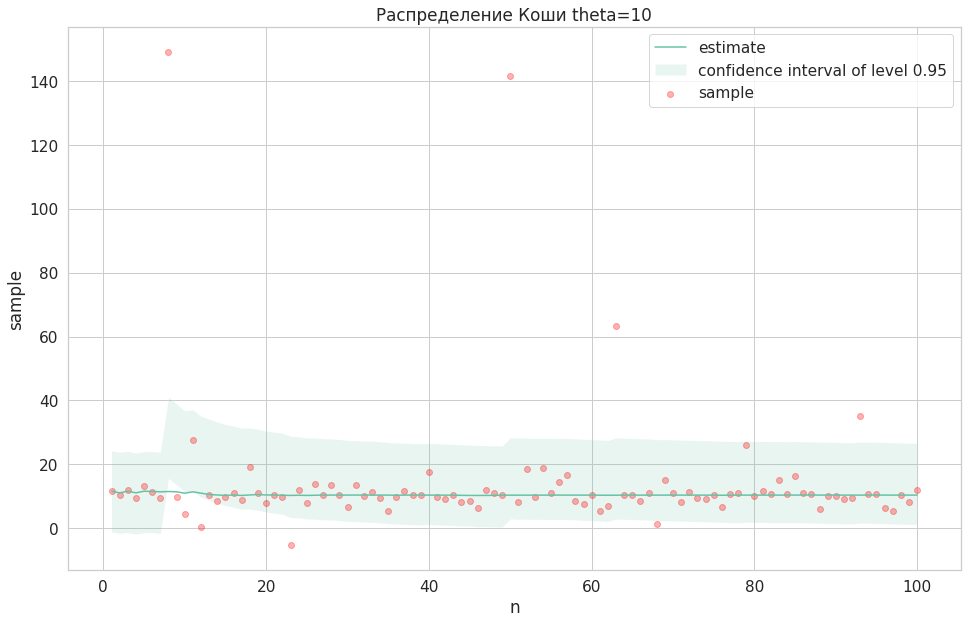

In [28]:
# YOUR CODE GOES HERE
def cauchy_CI(sample):
    left = sample.mean() - sps.cauchy().ppf((1+gamma)/2)
    right = sample.mean() - sps.cauchy().ppf((1-gamma)/2)
    
    return [left, right]

cauchy_sample = sps.cauchy(loc=10).rvs(size=N)
cauchy_estimates = np.array([np.median(cauchy_sample[:i]) for i in n])
cauchy_CI_ = np.array([cauchy_CI(cauchy_sample[:i]) for i in n])

draw_confidence_interval(cauchy_sample, cauchy_estimates, cauchy_CI_, "Распределение Коши theta=10")

### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

ДИ Уровня $\gamma = 0.95$ (через нер-во Чебышева) :

$$
((\sqrt{\overline{X}+\frac{1}{(1-\gamma)4n}}-\sqrt{\frac{1}{(1-\gamma)2n}})^2, (\sqrt{\overline{X}-\frac{1}{(1-\gamma)4n}}+\sqrt{\frac{1}{(1-\gamma)2n}})^2)
$$

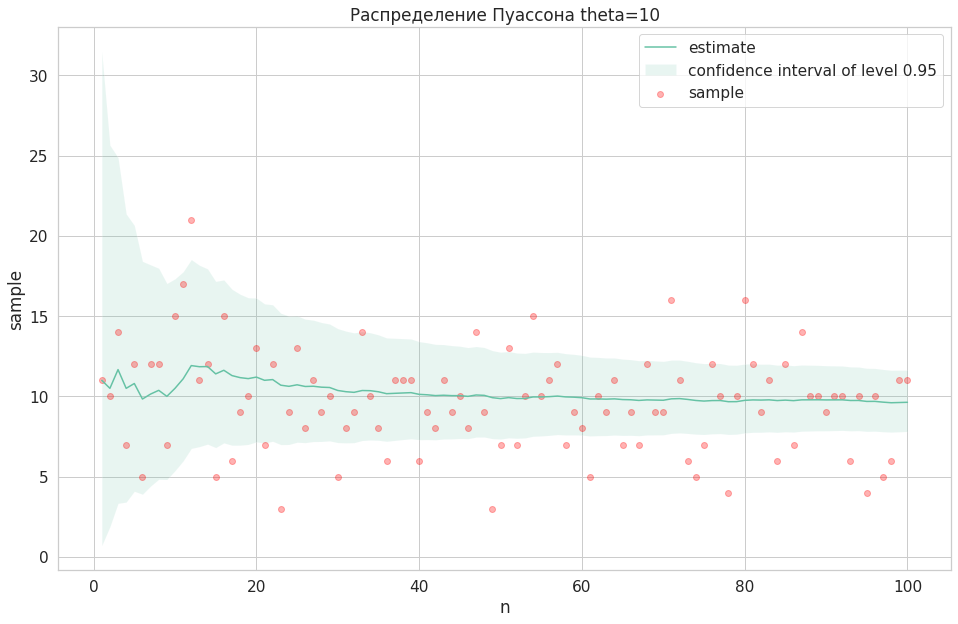

In [5]:
# YOUR CODE GOES HERE
def poisson_CI(sample):
    alpha = 1/((1-gamma)*4*len(sample))
    left = (np.sqrt(sample.mean() + alpha) - np.sqrt(2*alpha))**2
    right = (np.sqrt(sample.mean() - alpha) + np.sqrt(2*alpha))**2
    
    return [left, right]

poisson_sample = sps.poisson(10).rvs(size=N)
poisson_estimates = np.array([np.mean(poisson_sample[:i]) for i in n])
poisson_CI_ = np.array([poisson_CI(poisson_sample[:i]) for i in n])
draw_confidence_interval(poisson_sample, poisson_estimates, poisson_CI_, "Распределение Пуассона theta=10")

### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

$\widehat{\theta} = \frac{\overline{X}}{\lambda}$ оценка из метода моментов

ДИ Уровня $\gamma = 0.95$ (через нер-во Чебышева) :

$$
(\frac{\overline{X}}{\lambda+\sqrt{\frac{\lambda}{(1-\gamma)n}}}, \frac{\overline{X}}{\lambda-\sqrt{\frac{\lambda}{(1-\gamma)n}}})
$$

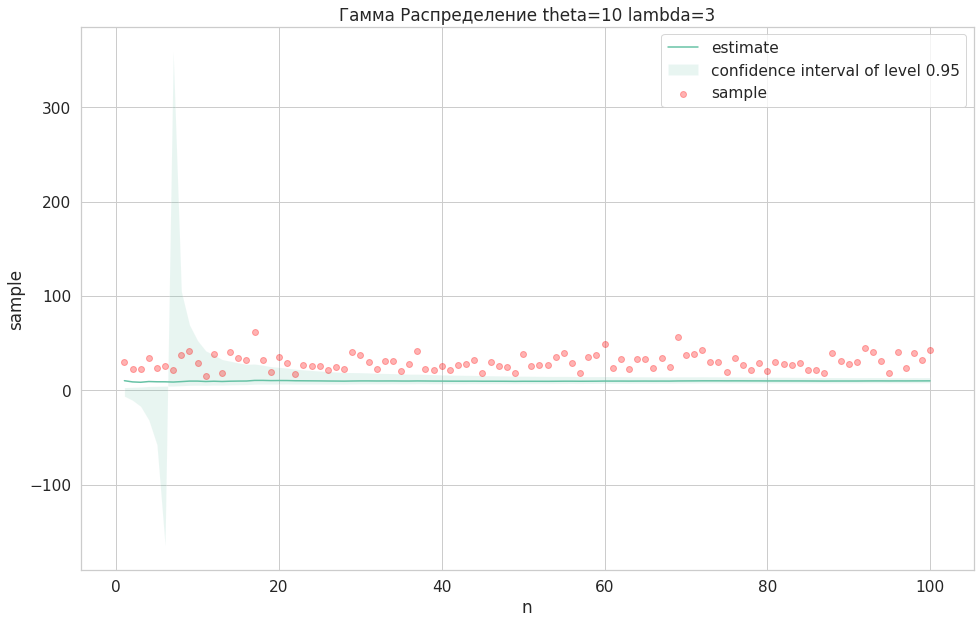

In [6]:
# YOUR CODE GOES HERE
# lambda =3

def gamma_CI(sample):
    alpha = np.sqrt(3/((1-gamma)*len(sample)))
    left = sample.mean() / (3 + alpha)
    right = sample.mean() / (3 - alpha)
    
    return [left, right]

gamma_sample = sps.gamma(10, loc=0, scale=3).rvs(size=N)
gamma_estimates = np.array([gamma_sample[:i].mean() for i in n]) / 3
gamma_CI_ = np.array([gamma_CI(gamma_sample[:i]) for i in n])

draw_confidence_interval(gamma_sample, gamma_estimates, gamma_CI_, "Гамма Распределение theta=10 lambda=3")

Сделайте выводы о размерах и форме доверительных интервалов для каждого случая.

**Вывод:**

- Для равномерного распределения формула для ДИ начинает нормально работать только при n >= 7, иначе правая граница меньше нуля. При $n \rightarrow \inf$ ДИ сходится к $\frac{\overline{X}}{2}$ как $\frac{1}{\sqrt{n}}$

- Для распределения Коши удалось построить точный ДИ, используя центральную статистику $\overline{X-\theta}$. Можно заметить, что с появлением выбросов центр ДИ съезжает в их сторону

- Для распределения Пуассона формула для ДИ также была получена через нер-во Чебышева. При $n \rightarrow \inf$ ДИ сходится к $\overline{X}$ как $\frac{1}{\sqrt{n}}$

- Для Гамма распределения все аналогично и при $n \rightarrow \inf$ ДИ сходится к $\frac{\overline{X}}{\lambda}$ как $\frac{1}{\sqrt{n}}$

# Задача 2

Для $n = 100$ оцените для кажого пункта предыдущей задачи вероятность попадания истинного значения
$\theta$ в интервал. Для этого нужно сделать слудующее:
1. Сгенерируйте достаточно много выборок из $P_{\theta}$
2. Постройте по каждой из них интервалы для $\widehat{\theta}$
3. Определите, сколько раз истинное значение $\theta.$ попадает в построенные интервалы. Таким способом будет
построена бернуллиевская выборка, по ней оцените вероятность.

Предположите, какое количество выборок нужно взять. Обоснуйте свой выбор.

__Ответ:__

Помним, что $\overline{X}$ -- эффективная оценка для параметра $\theta$ бернулиевской случайной величины. Найдем такое число выборок, что $|\theta - \overline{X}| \leq 0.05$ с вер-тью $\gamma = 0.95$

$$
P(|\theta - \overline{X}| \leq 0.05) \geq 1 - \frac{\theta (1-\theta)}{n \varepsilon ^ 2} = \gamma
$$

$$
n = \frac{\theta(1-\theta)}{(1-\gamma)\varepsilon ^ 2} \leq \frac{0.25}{0.05^3} = 2000
$$

In [7]:
# YOUR CODE GOES HERE
def CalcBernTheta(distribution, estimate, CI, M=2000, n=100):
    theta = 0
    for _ in range(M):
        sample = distribution.rvs(size=n)
        estimation = estimate(sample)
        left, right = CI(sample)
        if estimation >= left and estimation <= right:
            theta += 1.
    return theta / M

### Равномерное распределение

In [8]:
# YOUR CODE GOES HERE
CalcBernTheta(sps.uniform(loc=0, scale=10), np.max, uniform_CI)

1.0

### Распределение Коши

In [9]:
# YOUR CODE GOES HERE
CalcBernTheta(sps.cauchy(loc=10), np.median, cauchy_CI)

0.958

### Распределение Пуассона

In [10]:
# YOUR CODE GOES HERE
CalcBernTheta(sps.poisson(10), np.mean, poisson_CI)

1.0

### Гамма-распределение

In [11]:
# YOUR CODE GOES HERE
CalcBernTheta(sps.gamma(10, loc=0, scale=3), lambda x: np.mean(x)/3, gamma_CI)

1.0

Сделайте выводы.

Видим, что $\theta$ (как мы и хотели) лежит в районе $0.95 +- \: 0.05$

# Задача 3

В этой задаче мы построим точный и асимптотический доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:
$$
\frac{\overline{X}-a}{\frac{S}{\sqrt{n}}} \sim T(n-1)
$$

где S - несмещенная оценка стандартного отклонения

поэтому ДИ уровня $\alpha$
$$
(\overline{X}-t_{\frac{1+\alpha}{2}} \frac{S}{\sqrt{n}}, \overline{X}+t_{\frac{1+\alpha}{2}} \frac{S}{\sqrt{n}})
$$

где $t_{\gamma}$ - квантиль распределения Стьюдента уровня $\gamma$
* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$:

тк выборочная дисперсия -- состоятельная оценка:
$$
S^2 \rightarrow ^{P} \sigma^2 \:
$$
$$
\sqrt{n} \frac{\overline{X} - a}{\sigma} \rightarrow^{d} N(0,1)
$$
по Лемме Слуцкого:
$$
\sqrt{n} \frac{\overline{X} - a}{S} \rightarrow^{d} N(0,1)
$$

поэтому ДИ уровня $\alpha$
$$
(\overline{X}-u_{\frac{1+\alpha}{2}} \frac{S}{\sqrt{n}}, \overline{X}+u_{\frac{1+\alpha}{2}} \frac{S}{\sqrt{n}})
$$

где $u_{\gamma}$ - квантиль распределения $N(0,1)$ уровня $\gamma$

Для $n=30, \,a = 0$ постройте __на одном графике__ точный и асимптотический доверительный интервал, а также отметьте линией истинное значение $a$

In [12]:
def calculate_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление точного доверительного интервала уровня доверия alpha. """
    if len(sample) == 1:
        variance = 0
    else:
        variance = np.var(sample, ddof=1)
    beta = sps.t.ppf((1+alpha)/2, len(sample) - 1) * np.sqrt(variance/len(sample))
    return [np.mean(sample) - beta, np.mean(sample) + beta]

In [13]:
def calculate_asymptotic_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление асимптотического доверительного интервала уровня доверия alpha. """
    if len(sample) == 1:
        variance = 0
    else:
        variance = np.var(sample, ddof=1)
    beta = sps.norm.ppf((1+alpha)/2) * np.sqrt(variance/len(sample))
    return [np.mean(sample) - beta, np.mean(sample) + beta]

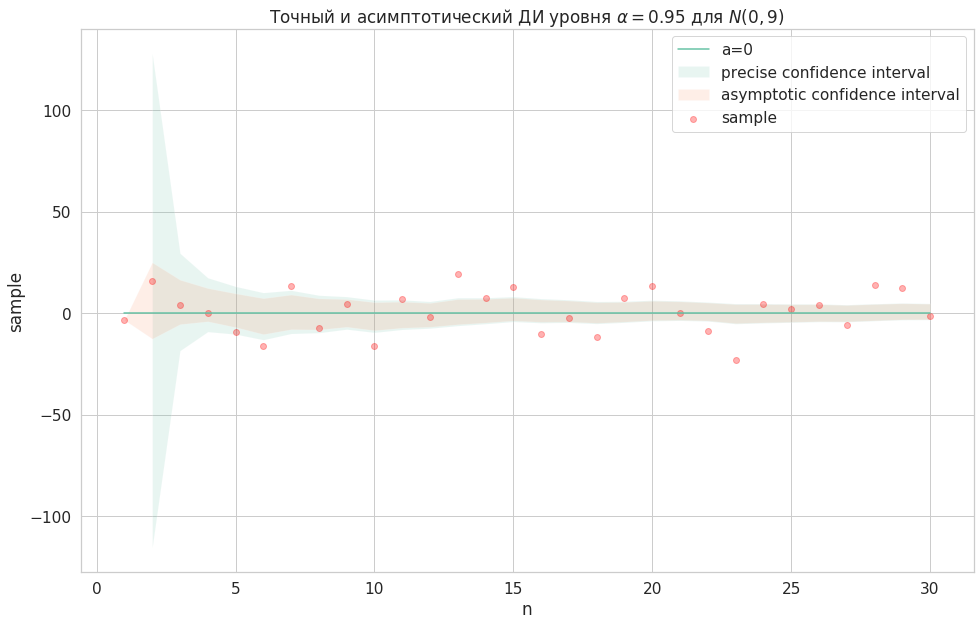

In [14]:
# YOUR CODE GOES HERE
ns = np.arange(1, 31)
# возьмем \sigma = 3
sample = sps.norm(0, 9).rvs(size=len(ns))
conf_interval = np.array([calculate_conf_interval(sample[:i]) for i in ns])
asymp_conf_interval = np.array([calculate_asymptotic_conf_interval(sample[:i]) for i in ns])

plt.figure(figsize=(16, 10))
plt.title("Точный и асимптотический ДИ уровня $\\alpha = 0.95$ для $N(0, 9)$")
plt.xlabel("n")
plt.ylabel("sample")

plt.plot(ns, np.zeros(len(ns)), label="a=0")
plt.fill_between(ns, conf_interval[:, 0], conf_interval[:, 1],
                 label="precise confidence interval", alpha=0.15)
plt.fill_between(ns, asymp_conf_interval[:, 0], asymp_conf_interval[:, 1],
                 label="asymptotic confidence interval", alpha=0.15)
plt.scatter(ns, sample, label="sample", alpha=0.3, color="r")

plt.legend()
plt.show()

Сделайте выводы. В каких случаях уместно использовать асимптотический интервал вместо точного?

- Доверительный интервал малого размера проще построить используя асимптотический ДИ (он уместен когда размер выборки большой)
- Однако если выборка малого размера лучше использовать точный ДИ

# Задача 4

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [15]:
!gdown https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC 

Downloading...
From: https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC
To: /home/archie/matstat_prac/Task4/city_day.csv
2.57MB [00:01, 1.64MB/s]


Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

In [16]:
# YOUR CODE GOES HERE
data = pd.read_csv("city_day.csv", parse_dates=["Date"], skipinitialspace=True, usecols=["City", "Date", "AQI"])
data.dropna(inplace=True)

Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

In [17]:
# YOUR CODE GOES HERE
data["month"] = data["Date"].dt.month
data["year"] = data["Date"].dt.year

data

,City,Date,AQI,month,year
28,Ahmedabad,2015-01-29,209.0,1,2015
29,Ahmedabad,2015-01-30,328.0,1,2015
30,Ahmedabad,2015-01-31,514.0,1,2015
31,Ahmedabad,2015-02-01,782.0,2,2015
32,Ahmedabad,2015-02-02,914.0,2,2015
...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,41.0,6,2020
29527,Visakhapatnam,2020-06-28,70.0,6,2020
29528,Visakhapatnam,2020-06-29,68.0,6,2020
29529,Visakhapatnam,2020-06-30,54.0,6,2020


Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

In [18]:
mumbai = data.loc[(data["City"] == "Mumbai") & (data["Date"] > "2018-07-01"), data.columns]
kolkata = data.loc[(data["City"] == "Kolkata") & (data["Date"] > "2018-07-01"), data.columns]

В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

Для каждого месяца с июля 2018 по июнь 2020 включтельно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

In [19]:
def get_dataset_by_month(
    df: pd.DataFrame, 
    year: int,
    month: int
):
    """ Сохранение в массив данные для указанного месяца и года."""
    # YOUR CODE GOES HERE
    return df.loc[(df["year"] == year) & (df["month"] == month), ["AQI"]].to_numpy()

In [20]:
def get_bootstrap_samples(
    sample: np.ndarray,
    k: int = 1000
):
    """ Построение k бутстрепных выборок для указанной выборки. """
    # YOUR CODE GOES HERE
    return np.array([np.random.choice(sample, len(sample)) for _ in range(k)])

In [21]:
def bootstrap_conf_interval(
    sample: np.ndarray,
    estimator: Callable = lambda x: np.mean(x, axis=-1),
    alpha: float = 0.95,
):
    """ Построение бутстрепных доверительных интервалов. """
    # YOUR CODE GOES HERE
    bootstraped = get_bootstrap_samples(sample)
    estimates = estimator(bootstraped)
    estimates.sort()
        
    left = np.int(np.floor(len(estimates)*(1-alpha)/2)) - 1
    right = np.int(np.floor(len(estimates)*(1+alpha)/2)) - 1
    return ([estimates[left], estimates[right]], estimates.mean())

In [22]:
# YOUR CODE GOES HERE
years_month = {
    2018 : range(7, 13),
    2019 : range(1, 13),
    2020 : range(1, 7)
}

mumbai_CI, mumbai_means = [], []
for year in years_month:
    for month in years_month[year]:
        sample = get_dataset_by_month(mumbai, year, month)[:, 0]
        conf_interval, mean = bootstrap_conf_interval(sample)
        mumbai_CI.append(conf_interval)
        mumbai_means.append(mean)
mumbai_CI, mumbai_means = np.array(mumbai_CI), np.array(mumbai_means)
        
kolkata_CI, kolkata_means = [], []
for year in years_month:
    for month in years_month[year]:
        sample = get_dataset_by_month(kolkata, year, month)[:, 0]
        conf_interval, mean = bootstrap_conf_interval(sample)
        kolkata_CI.append(conf_interval)
        kolkata_means.append(mean)
kolkata_CI, kolkata_means = np.array(kolkata_CI), np.array(kolkata_means)

Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

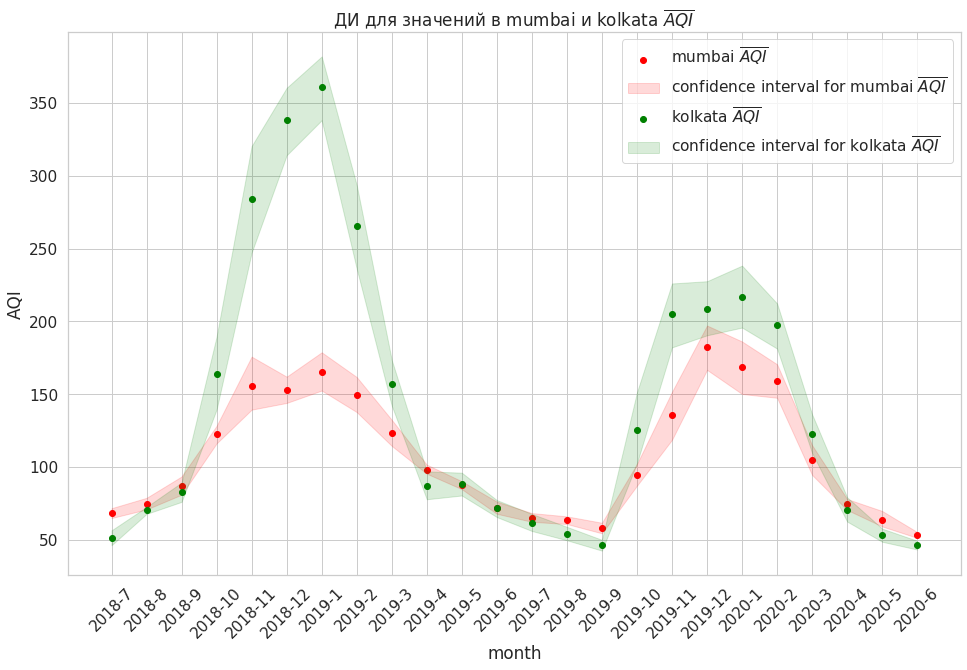

In [23]:
ym = mumbai[['year', 'month']].drop_duplicates().values[:-1]
labels = [f"{year}-{month}" for year, month in ym] # номера месяцев для подписей на графике 

# YOUR CODE GOES HERE
plt.figure(figsize=(16, 10))
plt.title("ДИ для значений в mumbai и kolkata $\\overline{AQI}$")
plt.xlabel("month")
plt.xticks(rotation=45)
plt.ylabel("AQI")

plt.scatter(labels, mumbai_means, color="r", label="mumbai $\\overline{AQI}$")
plt.fill_between(labels, mumbai_CI[:, 0], mumbai_CI[:, 1],
                 label="confidence interval for mumbai $\\overline{AQI}$", alpha=0.15, color="r")

plt.scatter(labels, kolkata_means, color="g", label="kolkata $\\overline{AQI}$")
plt.fill_between(labels, kolkata_CI[:, 0], kolkata_CI[:, 1],
                 label="confidence interval for kolkata $\\overline{AQI}$", alpha=0.15, color="g")
plt.legend()
plt.show()

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

Видно, что значения $\overline{AQI}$ в mumbai и kolkata скоррелированы. Также заметно что ДИ полученный бутстрепом больше при больших значениях средней оценки.

Можно предположить, что в месяцы с большим значением $\overline{AQI} = \frac{\sum_{i=1}^{k} \overline{X_i}}{k}$ ($X_i$ - i-ая бутстреп. выборка), больше дисперсия $\overline{X_i} \rightarrow$ больше ДИ

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

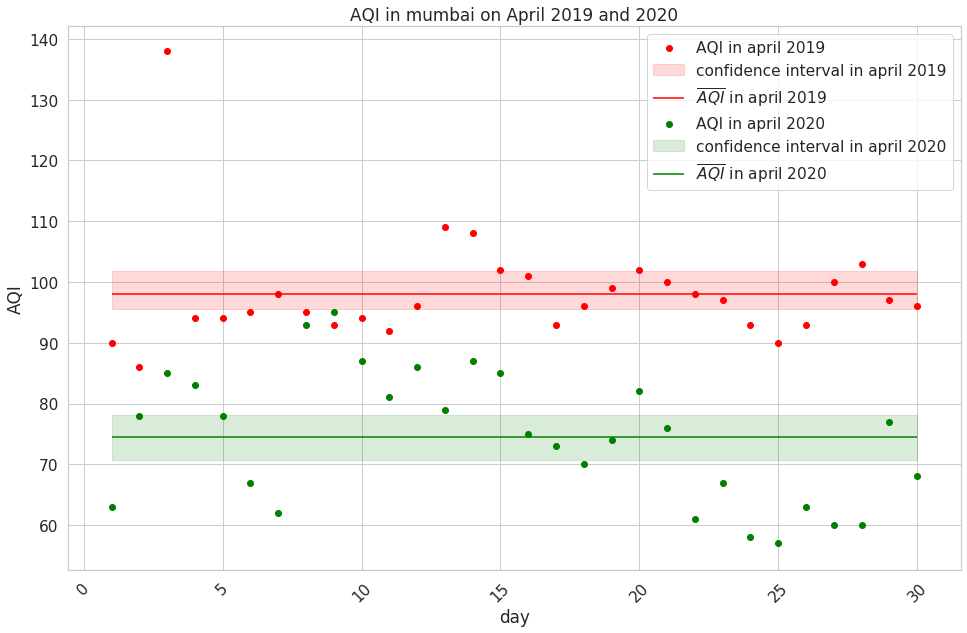

In [24]:
# YOUR CODE GOES HERE
labels = range(1, 31)

plt.figure(figsize=(16, 10))
plt.title("AQI in mumbai on April 2019 and 2020")
plt.xlabel("day")
plt.xticks(rotation=45)
plt.ylabel("AQI")

plt.scatter(labels, get_dataset_by_month(mumbai, 2019, 4), color="r", label="AQI in april 2019")
plt.fill_between(labels, *np.full((30, 2), mumbai_CI[9]).T,
                 label="confidence interval in april 2019", alpha=0.15, color="r")
plt.hlines(mumbai_means[9], 1, 30, color="r", label="$\\overline{AQI}$ in april 2019")

plt.scatter(labels, get_dataset_by_month(mumbai, 2020, 4), color="g", label="AQI in april 2020")
plt.fill_between(labels, *np.full((30, 2), mumbai_CI[21]).T,
                 label="confidence interval in april 2020", alpha=0.15, color="g")
plt.hlines(mumbai_means[21], 1, 30, color="g", label="$\\overline{AQI}$ in april 2020")

plt.legend()
plt.show()

Теперь проделайте то же самое для Калькутты

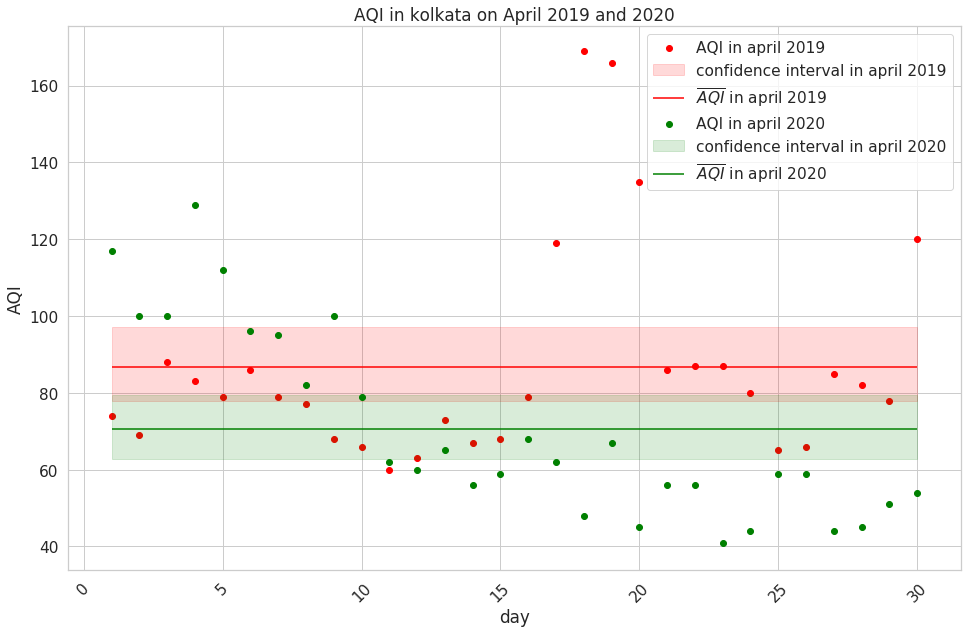

In [25]:
# YOUR CODE GOES HERE
labels = range(1, 31)

plt.figure(figsize=(16, 10))
plt.title("AQI in kolkata on April 2019 and 2020")
plt.xlabel("day")
plt.xticks(rotation=45)
plt.ylabel("AQI")

plt.scatter(labels, get_dataset_by_month(kolkata, 2019, 4), color="r", label="AQI in april 2019")
plt.fill_between(labels, *np.full((30, 2), kolkata_CI[9]).T,
                 label="confidence interval in april 2019", alpha=0.15, color="r")
plt.hlines(kolkata_means[9], 1, 30, color="r", label="$\\overline{AQI}$ in april 2019")

plt.scatter(labels, get_dataset_by_month(kolkata, 2020, 4), color="g", label="AQI in april 2020")
plt.fill_between(labels, *np.full((30, 2), kolkata_CI[21]).T,
                 label="confidence interval in april 2020", alpha=0.15, color="g")
plt.hlines(kolkata_means[21], 1, 30, color="g", label="$\\overline{AQI}$ in april 2020")
plt.legend()
plt.show()

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев?

- В обоих городах AQI в 2020 меньше чем 2019. 
- Также видно, что размер ДИ у Калькутты больше, проверим: больше ли дисперсия?

In [26]:
kolkata_2019 = get_dataset_by_month(kolkata, 2019, 4)
kolkata_2020 = get_dataset_by_month(kolkata, 2020, 4)

mumbai_2019 = get_dataset_by_month(mumbai, 2019, 4)
mumbai_2020 = get_dataset_by_month(mumbai, 2020, 4)

print("Kolkata variance: in 2019: {}, in 2020: {}".format(kolkata_2019.var(), kolkata_2020.var()))
print("Mumbai variance: in 2019: {}, in 2020: {}".format(mumbai_2019.var(), mumbai_2020.var()))

Kolkata variance: in 2019: 744.4266666666666, in 2020: 581.2322222222224
Mumbai variance: in 2019: 79.46222222222224, in 2020: 114.35555555555557


Действительно, дисперсия в Колькатте больше